In [37]:
# Importing all the necessary packages 
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
%matplotlib inline

In [38]:
# Reading the Diabetes-Dataset file to perform the support vector machine
names=['Pregnancies', 'Glucose', 'BloodPressure', 
       'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Class']
df=pd.read_csv(r'C:\Users\abish\Downloads\WPC 300\New folder\pima-indians-diabetes.csv',skiprows=9, header=None,names=names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
print('The shape of Diabetes Dataset:', df.shape)

The shape of Diabetes Dataset: (768, 9)


In [40]:
# Remove zero values
df = df[df['Glucose'] != 0]
df = df[df['BloodPressure'] != 0]
df = df[df['SkinThickness'] != 0]
df = df[df['Insulin'] != 0]
df = df[df['BMI'] != 0]
df = df[df['Age'] != 0]
print('The shape of Diabetes Dataset:', df.shape)

The shape of Diabetes Dataset: (392, 9)


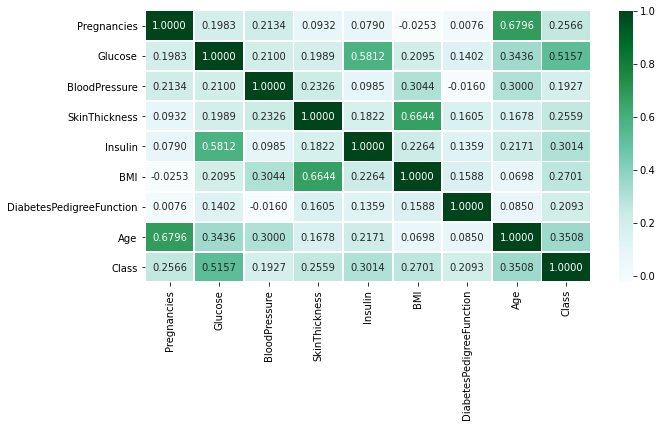

In [41]:
#Corelation Matrix
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), cmap = "BuGn", annot=True, linewidth=1, fmt='.4f', ax=ax)
plt.show()

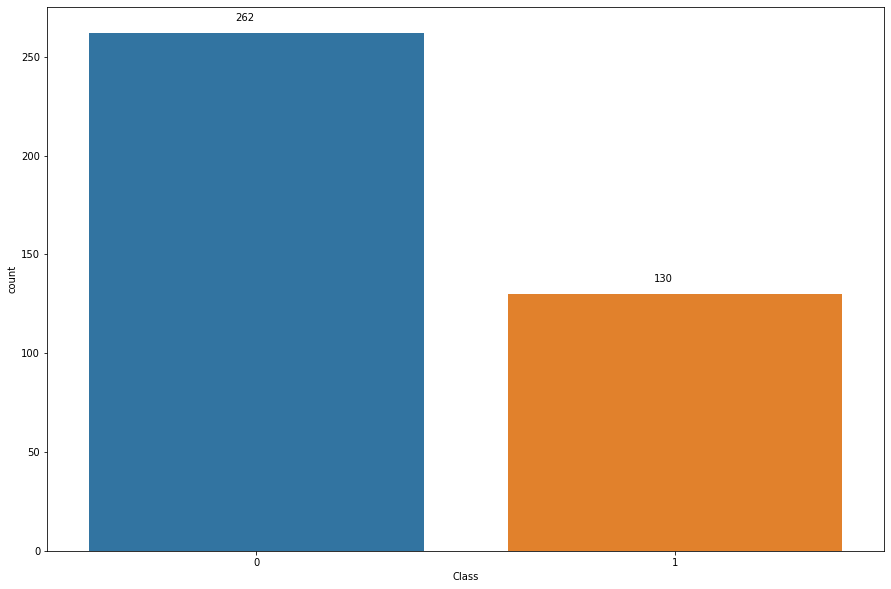

In [42]:
#Decision variable in the dataset is 'Class', countplot of the decision variable
plt.figure(figsize=(15,10))
Class_plot=sns.countplot(df.Class)
#To show the count of the respective class on a barplot 
for q in Class_plot.patches:
    Class_plot.annotate(str(q.get_height()), (q.get_x()+0.35, q.get_height()+5), va='bottom', color='black')
plt.show()

- As the counts of the target variable are in the ratio 1:2, we need to balance the data to predict the correct accuracy of the model

In [43]:
#Assigning the X and y
X=df.loc[:, df.columns != 'Class']
y=df.Class

## Summary of Statistics

In [44]:
# Mean, Median and Standard Deviation is calculated
pd.DataFrame({'Mean': X.mean(),'Standard Deviation': X.std()})

,Mean,Standard Deviation
Pregnancies,3.301020,3.211424
Glucose,122.627551,30.860781
BloodPressure,70.663265,12.496092
SkinThickness,29.145408,10.516424
Insulin,156.056122,118.841690
BMI,33.086224,7.027659
DiabetesPedigreeFunction,0.523046,0.345488
Age,30.864796,10.200777


In [45]:
# Covariance of X
X_Covariance=X.cov()
X_Covariance

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,10.313247,19.652043,8.561981,3.147933,30.144188,-0.572058,0.008390,22.263310
Glucose,19.652043,952.387781,80.994467,64.537672,2131.662900,45.439613,1.494605,108.179694
BloodPressure,8.561981,80.994467,156.152304,30.563156,146.295162,26.732178,-0.068951,38.245916
SkinThickness,3.147933,64.537672,30.563156,110.595171,227.710489,49.099706,0.583139,17.996692
Insulin,30.144188,2131.662900,146.295162,227.710489,14123.347226,189.081594,5.580072,263.163618
BMI,-0.572058,45.439613,26.732178,49.099706,189.081594,49.387994,0.385492,5.004782
DiabetesPedigreeFunction,0.008390,1.494605,-0.068951,0.583139,5.580072,0.385492,0.119362,0.299664
Age,22.263310,108.179694,38.245916,17.996692,263.163618,5.004782,0.299664,104.055842


In [12]:
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

K=5 fold Cross validation is performed for the AdaBoost Classifier with decision tree as base learner by choosing the hyperparameters below and using it I Grid Search CV
- The parameters that are changed for decision tree classifier from the SKLEARN defaults are:
    1.	Criterion: gini, entropy; default= gini
    2.	Splitter : Best, Random ; default=best
    3.	Max_Features: Auto,Sqrt, Log2, None, int ; default= None
    4.	Max_Depth= int(2,3,4); default=None
    5.	Class_weight= Balanced, it is used to adjust the weights of an imbalanced class. default= None
    6.	Random_state: int(43) ; default=None
    
    
- The parameters that are changed for AdaBoost Classifier classifier from the SKLEARN defaults are:
    1.	Base_estimator: None for Decision tree classifier
    2.	n_estimators: int(multiples of 10 from 10 to 200) ; default=50
    3.	random_state: int(53) ; default=None


In [55]:
kfold = model_selection.KFold(n_splits=5)
model_kfold = DecisionTreeClassifier()
parameters = {'estimator__base_estimator__criterion':['gini', 'entropy'], 'estimator__base_estimator__splitter':['best', 'random'], 'estimator__base_estimator__max_features':[ 'sqrt', 'log2', 'auto',100], 'estimator__base_estimator__max_depth':[2,3,4], 'estimator__n_estimators': [10*x for x in range(1, 20)],
             'estimator__random_state':[47],'estimator__base_estimator__class_weight':['balanced'] }
Ada=AdaBoostClassifier(base_estimator=model_kfold)
clf=GridSearchCV(Ada,parameters,cv=kfold,scoring='accuracy',n_jobs=-1)

In [61]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "base_estimator__max_features":[ "sqrt", "log2", "auto",100],
              "base_estimator__max_depth":[2,3,4],
              "n_estimators": [10*x for x in range(1, 20)]
             }


DTC = DecisionTreeClassifier(random_state = 11, class_weight = "balanced")

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [48]:
for param in grid_search_ABC.get_params().keys():
    print(param)

cv
error_score
estimator__algorithm
estimator__base_estimator__ccp_alpha
estimator__base_estimator__class_weight
estimator__base_estimator__criterion
estimator__base_estimator__max_depth
estimator__base_estimator__max_features
estimator__base_estimator__max_leaf_nodes
estimator__base_estimator__min_impurity_decrease
estimator__base_estimator__min_impurity_split
estimator__base_estimator__min_samples_leaf
estimator__base_estimator__min_samples_split
estimator__base_estimator__min_weight_fraction_leaf
estimator__base_estimator__presort
estimator__base_estimator__random_state
estimator__base_estimator__splitter
estimator__base_estimator
estimator__learning_rate
estimator__n_estimators
estimator__random_state
estimator
iid
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose


In [62]:
#Fitting the model
grid_search_ABC.fit(X,y)

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 134, in fit
    random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "C:\Users\abish\Anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line 513, in _boost_real
    es

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                random_state=11)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__max_depth': [2, 3, 4],
                         'base_estimator__max_features': ['sqrt', 'log2',
                                                          'auto', 100],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]},
             scoring='roc_auc')

In [63]:
#Creating a dataframe to print the result and sorting the mean test score in descending order
p=pd.DataFrame(grid_search_ABC.cv_results_).sort_values('mean_test_score',ascending=False)
p.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__criterion,param_base_estimator__max_depth,param_base_estimator__max_features,param_base_estimator__splitter,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
816,0.416478,0.032091,0.033907,0.010812,entropy,4,log2,best,190,"{'base_estimator__criterion': 'entropy', 'base...",0.794630,0.753991,0.862426,0.939349,0.870562,0.844192,0.064304,1
662,0.357250,0.051317,0.029260,0.008224,entropy,3,log2,best,170,"{'base_estimator__criterion': 'entropy', 'base...",0.804790,0.780116,0.836538,0.888314,0.835799,0.829111,0.036323,2
206,0.343120,0.038927,0.032276,0.006620,gini,3,log2,best,170,"{'base_estimator__criterion': 'gini', 'base_es...",0.793179,0.780842,0.833580,0.863166,0.866124,0.827378,0.035088,3
807,0.203635,0.023759,0.014960,0.000631,entropy,4,log2,best,100,"{'base_estimator__criterion': 'entropy', 'base...",0.792453,0.715530,0.846154,0.917160,0.863905,0.827040,0.068523,4
345,0.073644,0.013082,0.008735,0.001619,gini,4,log2,best,40,"{'base_estimator__criterion': 'gini', 'base_es...",0.831640,0.746009,0.818787,0.876479,0.861686,0.826920,0.045387,5


- From the above result we came to know that the parameters for the best model are: criterion='entropy',splitter='best', max_features='log2', random_state=11, class_weight='balanced', max_depth = 4,n_estimator=190 and its mean test score is 84.41%

In [64]:
# Model prediction on the Train and Test set (20% of the data)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (313, 8) (313,)
Test set: (79, 8) (79,)


In [70]:
model = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',splitter='best', max_features='log2', random_state=42, class_weight='balanced', max_depth = 4), n_estimators=190, random_state=11)


In [71]:
model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=4,
                                                         max_features='log2',
                                                         random_state=42),
                   n_estimators=190, random_state=11)

In [72]:
#After being fitted, the model can then be used to predict new values:
yhat = model.predict(X_test)
yhat [0:5]
y_pred_train = model.predict(X_train)
current_test_acc = metrics.accuracy_score(y_test, yhat)
print(current_test_acc)

0.7341772151898734


In [73]:
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        52
           1       0.62      0.56      0.59        27

    accuracy                           0.73        79
   macro avg       0.70      0.69      0.70        79
weighted avg       0.73      0.73      0.73        79



In [74]:
# Accuracy (Train & Test) , Generalization Error for Train (1-Train Accuracy) and Test (1- Test Accuracy) is calculated:
print('Train Accuracy = {} '.format(accuracy_score(y_train, y_pred_train)))
print('Test Accuracy = {} '.format(accuracy_score(y_test, yhat)))
print('Generalization Error on Train = {}'.format(1.0-accuracy_score(y_train, y_pred_train)))
print('Generalization Error on Test = {}'.format(1.0-accuracy_score(y_test, yhat)))
print('Balanced Accuracy score = {}'.format(balanced_accuracy_score(y_train, y_pred_train)))

Train Accuracy = 1.0 
Test Accuracy = 0.7341772151898734 
Generalization Error on Train = 0.0
Generalization Error on Test = 0.26582278481012656
Balanced Accuracy score = 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       103

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313

[[210   0]
 [  0 103]]


<AxesSubplot:>

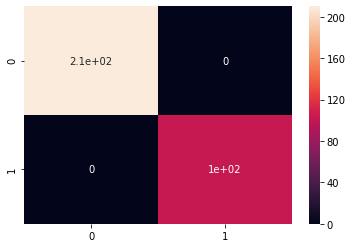

In [75]:
# Compute confusion matrix for train dataset
cnf_matrix1 = confusion_matrix(y_train, y_pred_train, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_train, y_pred_train))
print(cnf_matrix1)
sns.heatmap(cnf_matrix1, annot=True)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        52
           1       0.62      0.56      0.59        27

    accuracy                           0.73        79
   macro avg       0.70      0.69      0.70        79
weighted avg       0.73      0.73      0.73        79

[[43  9]
 [12 15]]


<AxesSubplot:>

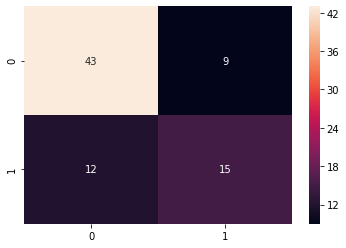

In [76]:
# Compute confusion matrix for test dataset
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True)

In [77]:
y_test_prob = model.predict_proba(X_test)[:, 1]

In [78]:
from sklearn.metrics import roc_curve, auc
#Compute the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,y_test_prob)
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.771368


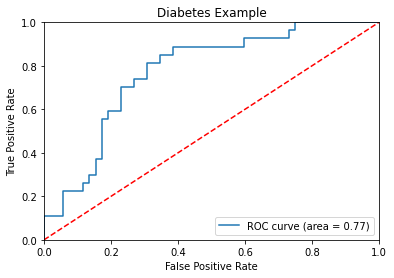

In [79]:
# Plot ROC curve
import pylab as pl
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'r--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Diabetes Example')
pl.legend(loc="lower right")
pl.show()